## Predict

In [1]:
# locad model with picle
import pickle


with open('model/model_life_expectancy_edaix.pkl', 'rb') as f:
    pipeline, model_estimator, columns, country, status = pickle.load(f)

In [2]:
columns

array(['year', 'adult_mortality', 'infant_deaths', 'alcohol', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources',
       'schooling'], dtype=object)

In [3]:
model_estimator

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [4]:
import numpy as np
import pandas as pd

In [5]:
# Cargamos la informacion desde un archivo csv y generamos un dataframe
df_concrete = pd.read_csv('./data/Life_Expectancy_Data.csv')

In [6]:
# eliminar espacios y pasar nombres a minusculas de las columnas
df_concrete.columns = df_concrete.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
df_concrete.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
df_train = df_concrete[(df_concrete['year'] < 2015)]
df_val = df_concrete[(df_concrete['year'] >= 2015)]

In [24]:
df_val.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            177
percentage_expenditure               0
hepatitis_b                          9
measles                              0
bmi                                  2
under-five_deaths                    0
polio                                0
total_expenditure                  181
diphtheria                           0
hiv/aids                             0
gdp                                 29
population                          41
thinness__1-19_years                 2
thinness_5-9_years                   2
income_composition_of_resources     10
schooling                           10
dtype: int64

In [25]:
df_train_cl = df_val.dropna(subset=['life_expectancy'])
df_y = df_train_cl['life_expectancy']

In [26]:
df_train_cl['country_idx'] = df_train_cl['country'].map(country)
df_train_cl['status_idx'] = df_train_cl['status'].map(status)

In [27]:
y_test = df_train_cl.life_expectancy
X_test = df_train_cl.drop(columns='life_expectancy')

In [28]:
X_test.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,country_idx,status_idx
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0
16,Albania,2015,Developing,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,1,0
32,Algeria,2015,Developing,19.0,21,NaN,0.000000,95.0,63,59.5,...,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,2,0
48,Angola,2015,Developing,335.0,66,NaN,0.000000,64.0,118,23.3,...,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,3,0
64,Antigua and Barbuda,2015,Developing,13.0,0,NaN,0.000000,99.0,0,47.7,...,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,4,0


In [29]:
df_numeric = X_test.select_dtypes(include=[np.number])

In [30]:
# llenamos columnas nullas con la media de cada columna
df_numeric_imputed = pd.DataFrame(pipeline.fit_transform(df_numeric), columns=df_numeric.columns)

In [31]:
df_numeric_imputed

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,country_idx,status_idx
0,2015.0,263.0,62.0,0.010000,71.279624,65.0,1154.0,19.1,83.0,6.0,...,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1,0.0,0.0
1,2015.0,74.0,0.0,4.600000,364.975229,99.0,0.0,58.0,0.0,99.0,...,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2,1.0,0.0
2,2015.0,19.0,21.0,5.288333,0.000000,95.0,63.0,59.5,24.0,95.0,...,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4,2.0,0.0
3,2015.0,335.0,66.0,5.288333,0.000000,64.0,118.0,23.3,98.0,7.0,...,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4,3.0,0.0
4,2015.0,13.0,0.0,5.288333,0.000000,99.0,0.0,47.7,0.0,86.0,...,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2015.0,157.0,9.0,5.288333,0.000000,87.0,0.0,62.1,10.0,87.0,...,87.0,0.1,7185.331746,1.109741e+07,1.6,1.5,0.769,14.3,178.0,0.0
179,2015.0,127.0,28.0,5.288333,0.000000,97.0,256.0,17.5,35.0,97.0,...,97.0,0.1,7185.331746,1.109741e+07,14.2,14.5,0.678,12.6,179.0,0.0
180,2015.0,224.0,37.0,5.288333,0.000000,69.0,468.0,41.3,47.0,63.0,...,69.0,0.1,7185.331746,1.109741e+07,13.6,13.4,0.499,9.0,180.0,0.0
181,2015.0,33.0,27.0,5.288333,0.000000,9.0,9.0,23.4,40.0,9.0,...,9.0,4.1,1313.889646,1.615870e+05,6.3,6.1,0.576,12.5,181.0,0.0


In [32]:
df_numeric_imputed[columns]

,year,adult_mortality,infant_deaths,alcohol,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015.0,263.0,62.0,0.010000,19.1,83.0,6.0,8.16,65.0,0.1,3.373649e+07,17.2,17.3,0.479,10.1
1,2015.0,74.0,0.0,4.600000,58.0,0.0,99.0,6.00,99.0,0.1,2.887300e+04,1.2,1.3,0.762,14.2
2,2015.0,19.0,21.0,5.288333,59.5,24.0,95.0,7.08,95.0,0.1,3.987153e+07,6.0,5.8,0.743,14.4
3,2015.0,335.0,66.0,5.288333,23.3,98.0,7.0,7.08,64.0,1.9,2.785935e+06,8.3,8.2,0.531,11.4
4,2015.0,13.0,0.0,5.288333,47.7,0.0,86.0,7.08,99.0,0.2,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2015.0,157.0,9.0,5.288333,62.1,10.0,87.0,7.08,87.0,0.1,1.109741e+07,1.6,1.5,0.769,14.3
179,2015.0,127.0,28.0,5.288333,17.5,35.0,97.0,7.08,97.0,0.1,1.109741e+07,14.2,14.5,0.678,12.6
180,2015.0,224.0,37.0,5.288333,41.3,47.0,63.0,7.08,69.0,0.1,1.109741e+07,13.6,13.4,0.499,9.0
181,2015.0,33.0,27.0,5.288333,23.4,40.0,9.0,7.08,9.0,4.1,1.615870e+05,6.3,6.1,0.576,12.5


In [42]:
y_predict = model_estimator.predict(df_numeric_imputed[columns])

In [48]:
df_numeric_imputed.loc[0,columns].to_json()

'{"year":2015.0,"adult_mortality":263.0,"infant_deaths":62.0,"alcohol":0.01,"bmi":19.1,"under-five_deaths":83.0,"polio":6.0,"total_expenditure":8.16,"diphtheria":65.0,"hiv\\/aids":0.1,"population":33736494.0,"thinness__1-19_years":17.2,"thinness_5-9_years":17.3,"income_composition_of_resources":0.479,"schooling":10.1}'

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
r2

0.9136888830964306

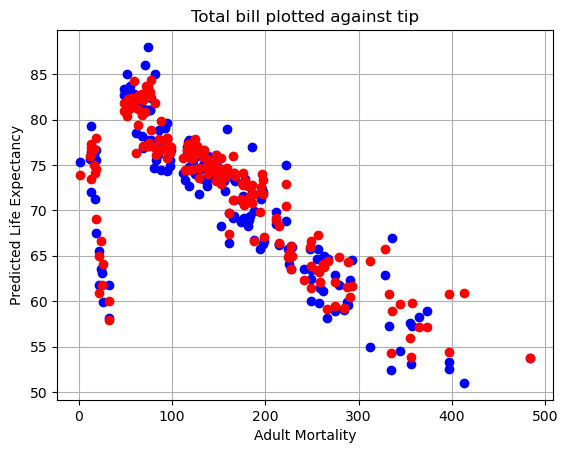

In [35]:
# Visualizacion de resultados
import matplotlib.pyplot as plt

plt.figure() 
plt.title('Total bill plotted against tip') 
plt.xlabel('Adult Mortality') 
plt.ylabel('Predicted Life Expectancy') 
plt.plot(X_test.adult_mortality	, y_test, 'bo') 

plt.plot(X_test.adult_mortality	, y_predict, 'ro') 
#plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()

In [38]:
df_numeric_imputed.iloc[0,:].to_json()

'{"year":2015.0,"adult_mortality":263.0,"infant_deaths":62.0,"alcohol":0.01,"percentage_expenditure":71.27962362,"hepatitis_b":65.0,"measles":1154.0,"bmi":19.1,"under-five_deaths":83.0,"polio":6.0,"total_expenditure":8.16,"diphtheria":65.0,"hiv\\/aids":0.1,"gdp":584.25921,"population":33736494.0,"thinness__1-19_years":17.2,"thinness_5-9_years":17.3,"income_composition_of_resources":0.479,"schooling":10.1,"country_idx":0.0,"status_idx":0.0}'

In [40]:
y_test[0]

np.float64(65.0)

In [41]:
y_predict[0]

np.float32(63.74215)